In [9]:
import pandas as pd
import matplotlib.pyplot as plt

### ANALISI ESPLORATIVA DATASET UTENTE-ITEM-RATING

In [2]:
col = ['user', 'item', 'rating', 'timestamp']
df = pd.read_csv("ml-100k/u.data", sep='\t', names=col)
df.head()

,user,item,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user       100000 non-null  int64
 1   item       100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [36]:
df.nunique()

user           943
item          1682
rating           5
timestamp    49282
dtype: int64

<AxesSubplot:>

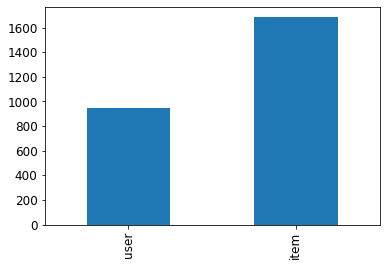

In [35]:
df[["user", "item"]].nunique().plot(kind="bar")

<AxesSubplot:>

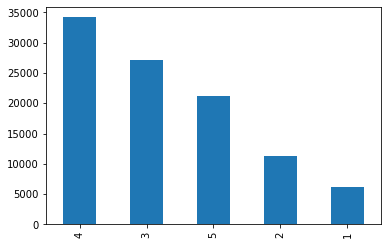

In [29]:
df.rating.value_counts().plot(kind='bar')

In [30]:
df["rating"].describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [88]:
df.value_counts("user").sort_values(ascending=False)[0:10]

user
405    737
655    685
13     636
450    540
276    518
416    493
537    490
303    484
234    480
393    448
dtype: int64

<AxesSubplot:xlabel='user'>

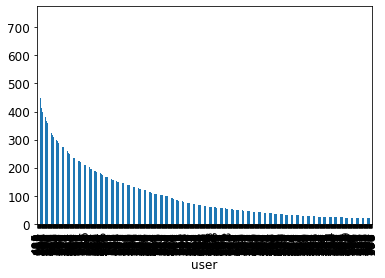

In [105]:
df.value_counts("user").sort_values(ascending=False).plot(kind="bar", legend=False)


<AxesSubplot:>

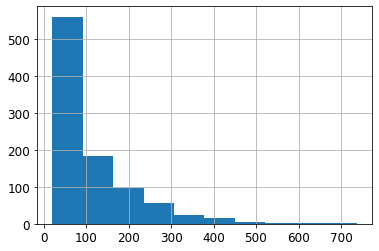

In [78]:
df.value_counts("user").hist()

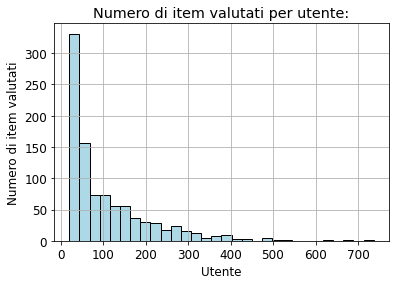

In [41]:
df.groupby("user").item.count().hist(
    bins=30,
    edgecolor='k',
    facecolor='lightblue',
    density=False
)
plt.title('Numero di item valutati per utente:')
plt.xlabel('Utente')
plt.ylabel('Numero di item valutati')



plt.rcParams.update({'font.size': 12})

<AxesSubplot:xlabel='user', ylabel='item'>

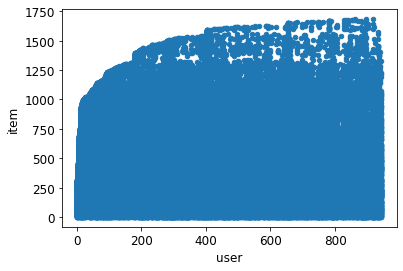

In [74]:
df[["user", "item"]].plot.scatter(x="user", y="item")

<AxesSubplot:>

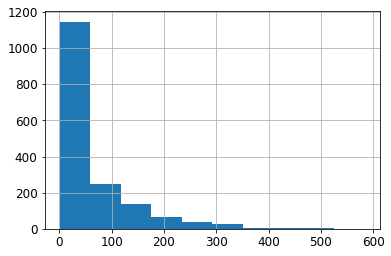

In [79]:
df.value_counts("item").hist()

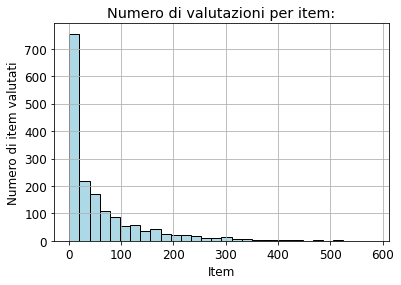

In [43]:
df.groupby("item").user.count().hist(
    bins=30,
    edgecolor='k',
    facecolor='lightblue',
    density=False
)
plt.title('Numero di valutazioni per item:')
plt.xlabel('Item')
plt.ylabel('Numero di item valutati')

plt.rcParams.update({'font.size': 12})

## DATASET ITEM

In [18]:
item_col = ["movie_id","movie_title","release_date","video_release_date",
"IMDb_URL","unknown","Action","Adventure","Animation",
"Children's","Comedy","Crime","Documentary","Drama","Fantasy",
"Film_Noir","Horror","Musical","Mystery","Romance","Sci_Fi",
"Thriller","War","Western"]


item_df =  df = pd.read_csv("ml-100k/u.item", sep='|', names = item_col, encoding='latin-1')
item_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## USER ITEM

In [22]:
user_col = ["user_id", "age", "gender", "occupation", "zip_code"]

user_df =  df = pd.read_csv("ml-100k/u.user", sep='|', names=user_col)
user_df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [24]:
user_df.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000
